<a href="https://colab.research.google.com/github/Sultan-manjur/BME/blob/main/autoencoder_ekhane_korlam_for_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os    
import numpy as np                   # OS is for interfacing your own operative system
import pandas as pd             # Pandas is for data analysis and structure manipulation
import matplotlib               # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt # PyPlot is a subset of the library for making MATLAB-style plots
import h5py
fid = h5py.File(r"dataset_patchcamelyon.h5")
X, Y = fid['X'][:], fid['Y'][:]
X = X / 255.
fid.close()
Y=Y.reshape(-1)
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True, stratify=Y)
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,shuffle=True, stratify=Y_train)

adam
relu
adam
selu
adam
tanh
rmsprop
relu
rmsprop
selu
rmsprop
tanh


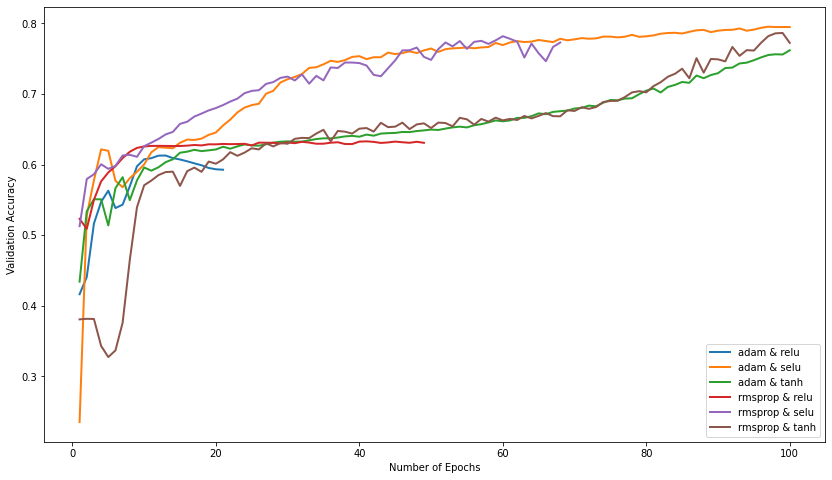

In [ ]:
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import keras.layers as layers
import tensorflow as tf
import keras

ls1=['relu','selu','tanh']
ls2=['adam','rmsprop']
def autoencoder_decoder(opt,act,x_t,x_v):
  encoder=keras.models.Sequential([ 
                      keras.layers.Conv2D(32, (3, 3), activation=act, padding="same",input_shape=(96, 96, 3)),
                      keras.layers.MaxPooling2D((2, 2), padding="same"),
                      layers.Conv2D(4, (3, 3), activation=act, padding="same"),
                      keras.layers.MaxPooling2D((2, 2), padding="same")
                      
  ])
  decoder=keras.models.Sequential([ 
                      keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation=act, padding="same"),
                      keras.layers.Conv2DTranspose(4, (3, 3), strides=2, activation=act, padding="same"),
                      keras.layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same") 
  ])
  autoencoder = Sequential()
  autoencoder.add(encoder)
  autoencoder.add(decoder)
  autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

  earlystop_cb = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=8, restore_best_weights=True)
  process=autoencoder.fit(
    x=x_t,
    y=x_t,
    epochs=100,
    batch_size=200,  # 128 chilo
    shuffle=True,
    validation_data=(x_v, x_v),
    verbose=0,
    callbacks=[earlystop_cb]

  )
  val_accuracy_score = process.history.get('val_accuracy')
  return opt,act,val_accuracy_score
optimizer_name=[]
activation_name=[]
val_acc=[]
for i in ls2:
  for j in ls1:
    temp1,temp2,temp3= autoencoder_decoder(i,j,x_train,x_val)
    optimizer_name.append(temp1)
    activation_name.append(temp2)
    val_acc.append(temp3)
    print(i)
    print(j)

plt.figure(figsize=(14,8))
for i in range(6):
   
  plt.plot(range(1,len(val_acc[i])+1), val_acc[i], linewidth=2 , label=optimizer_name[i]+' '+'&'+' '+ activation_name[i])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Validation Accuracy')
  plt.legend(loc='lower right')



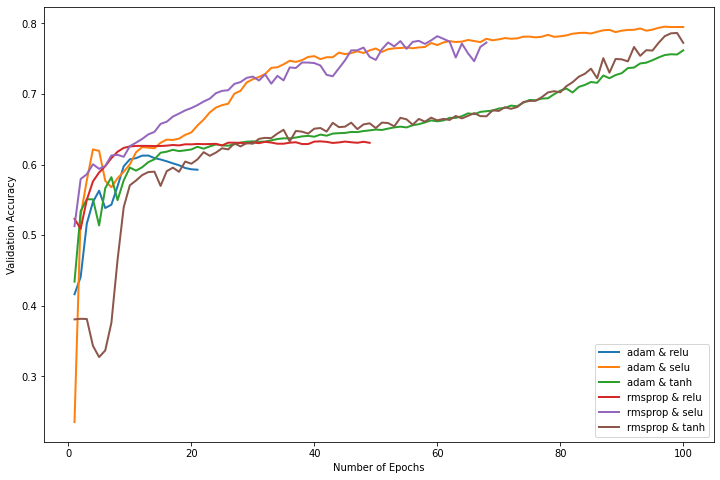

In [ ]:
plt.figure(figsize=(12,8))
for i in range(6):
   
  plt.plot(range(1,len(val_acc[i])+1), val_acc[i], linewidth=2 , label=optimizer_name[i]+' '+'&'+' '+ activation_name[i])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Validation Accuracy')
  plt.legend(loc='lower right')

In [ ]:
encoder=keras.models.Sequential([ 
                      keras.layers.Conv2D(32, (3, 3), activation="selu", padding="same",input_shape=(96, 96, 3)),
                      keras.layers.MaxPooling2D((2, 2), padding="same"),
                      layers.Conv2D(4, (3, 3), activation="selu", padding="same"),
                      keras.layers.MaxPooling2D((2, 2), padding="same")
])
decoder=keras.models.Sequential([ 
                      keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation="selu", padding="same"),
                      keras.layers.Conv2DTranspose(4, (3, 3), strides=2, activation="selu", padding="same"),
                      keras.layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same") 
])
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary() 

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_90 (Sequential)  (None, 24, 24, 4)         2052      
                                                                 
 sequential_91 (Sequential)  (None, 96, 96, 3)         2451      
                                                                 
Total params: 4,503
Trainable params: 4,503
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 48, 48, 4)         1156      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 24, 24, 4)        0         
 g2D)                                                            
                                                                 
Total params: 2,052
Trainable params: 2,052
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_58 (Conv2D  (None, 48, 48, 32)       1184      
 Transpose)                                                      
                                                                 
 conv2d_transpose_59 (Conv2D  (None, 96, 96, 4)        1156      
 Transpose)                                                      
                                                                 
 conv2d_89 (Conv2D)          (None, 96, 96, 3)         111       
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop_cb = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10, restore_best_weights=True)
process=autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=100,
    batch_size=200,  # 128 chilo
    shuffle=True,
    validation_data=(x_val, x_val),
    callbacks=[earlystop_cb])

Epoch 1/100
8/8 [==============================] - 2s 197ms/step - loss: 0.6807 - accuracy: 0.3530 - val_loss: 0.6579 - val_accuracy: 0.3758
Epoch 2/100
8/8 [==============================] - 1s 152ms/step - loss: 0.6461 - accuracy: 0.3481 - val_loss: 0.6404 - val_accuracy: 0.3825
Epoch 3/100
8/8 [==============================] - 1s 153ms/step - loss: 0.6356 - accuracy: 0.3525 - val_loss: 0.6306 - val_accuracy: 0.4038
Epoch 4/100
8/8 [==============================] - 1s 154ms/step - loss: 0.6277 - accuracy: 0.4060 - val_loss: 0.6238 - val_accuracy: 0.4676
Epoch 5/100
8/8 [==============================] - 1s 153ms/step - loss: 0.6193 - accuracy: 0.4941 - val_loss: 0.6139 - val_accuracy: 0.5219
Epoch 6/100
8/8 [==============================] - 1s 153ms/step - loss: 0.6070 - accuracy: 0.5437 - val_loss: 0.5985 - val_accuracy: 0.5319
Epoch 7/100
8/8 [==============================] - 1s 154ms/step - loss: 0.5915 - accuracy: 0.5300 - val_loss: 0.5864 - val_accuracy: 0.5103
Epoch 8/100
8

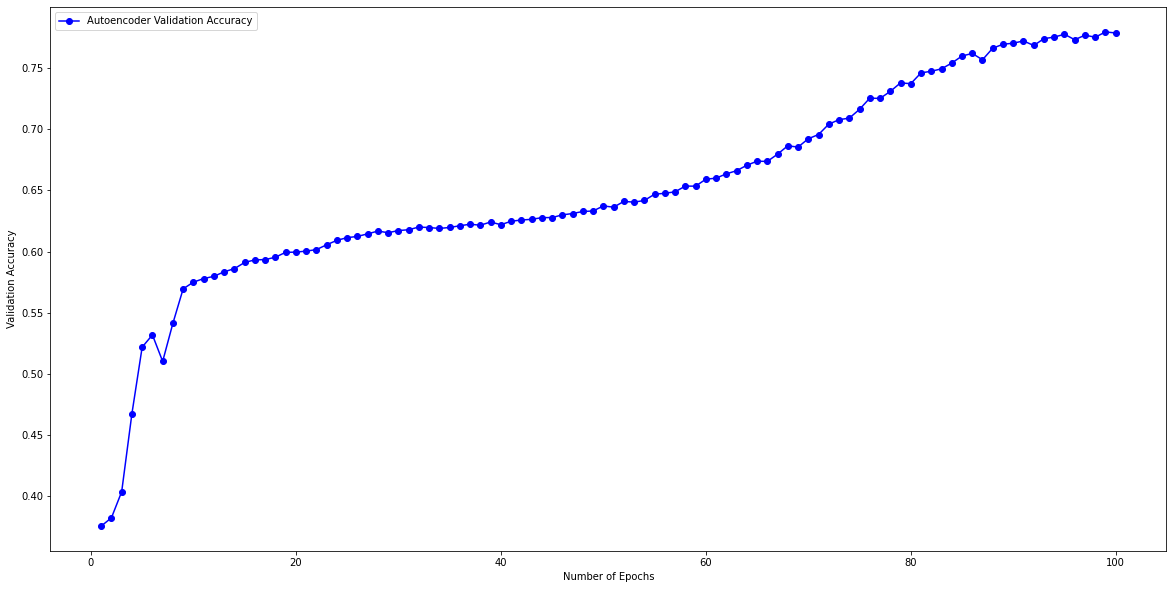

In [ ]:
accuracy_score = process.history.get('val_accuracy')
plt.figure(figsize=(20,10))
plt.plot(range(1,len(accuracy_score)+1), accuracy_score, color='b', marker='o',label='Autoencoder Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(loc='upper left')

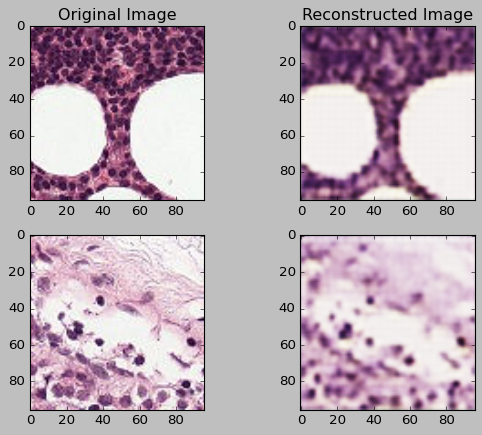

In [ ]:
encoded_data=encoder(x_test)
decoder_data=decoder(encoded_data)
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.imshow(x_test[50])
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(decoder_data[50])
plt.title('Reconstructed Image')
plt.subplot(2,2,3)
plt.imshow(x_test[62])

plt.subplot(2,2,4)
plt.imshow(decoder_data[62])

plt.show()

In [ ]:
encoded_data=encoder(X_train)
encoded_data=encoded_data.numpy()
encoded_data.shape

(2000, 24, 24, 4)

In [ ]:
encoded_data=encoded_data.reshape(encoded_data.shape[0],-1)

In [ ]:
encoded_data.shape

(2000, 2304)

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly'],
            'gamma':['scale','auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200],
            'criterion':['entropy','gini']
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,15],
            'weights': ['uniform','distance'],
            'p':[1,2]
        }
    },
    'AdaBoost':{
        'model': AdaBoostClassifier(),
        'params':{
            'n_estimators': [50,100,200],
            'learning_rate':[0.5,1,2]
        }
    }


}
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(encoded_data,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


,model,best_score,best_params
0,svm,0.7600,"{'kernel': 'poly', 'gamma': 'auto', 'C': 1}"
1,random_forest,0.7825,"{'n_estimators': 200, 'criterion': 'gini'}"
2,knn,0.7635,"{'weights': 'distance', 'p': 2, 'n_neighbors': 5}"
3,AdaBoost,0.7505,"{'n_estimators': 200, 'learning_rate': 0.5}"


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200,criterion='gini')
clf.fit(encoded_data,Y_train)
test_encoded=encoder(x_test)
test_encoded=test_encoded.numpy()
test_encoded=test_encoded.reshape(test_encoded.shape[0],-1)
y_pred=clf.predict(test_encoded)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       237
           1       0.73      0.83      0.78       263

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



In [ ]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf1 = RandomForestClassifier(n_estimators=200,criterion='gini')
#clf2=SGDClassifier(loss='log',penalty='l2')
clf3=KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')
clf2=SVC(C=1,kernel="poly",gamma='auto',probability=True)
clf4=AdaBoostClassifier(n_estimators=200,learning_rate=0.5)

#clf5=GaussianNB(var_smoothing=1e-9)
model = VotingClassifier(estimators=[ ('rf',clf1),('svm',clf2),('knn', clf3),('Adaboost',clf4)], voting='soft')  #, ('sgd', clf2)

In [ ]:
model.fit(encoded_data,Y_train)
y_pred=model.predict(test_encoded)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68       237
           1       0.70      0.88      0.78       263

    accuracy                           0.74       500
   macro avg       0.76      0.73      0.73       500
weighted avg       0.76      0.74      0.74       500



Text(0.5, 1.0, 'Confusion Matrix')

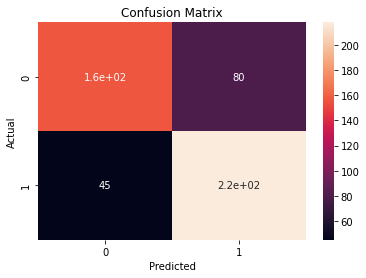

In [ ]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, np.array(y_pred))
#np.fill_diagonal(conf_mat, 0)
plt.figure(figsize=(6,4))
seaborn.heatmap(conf_mat, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

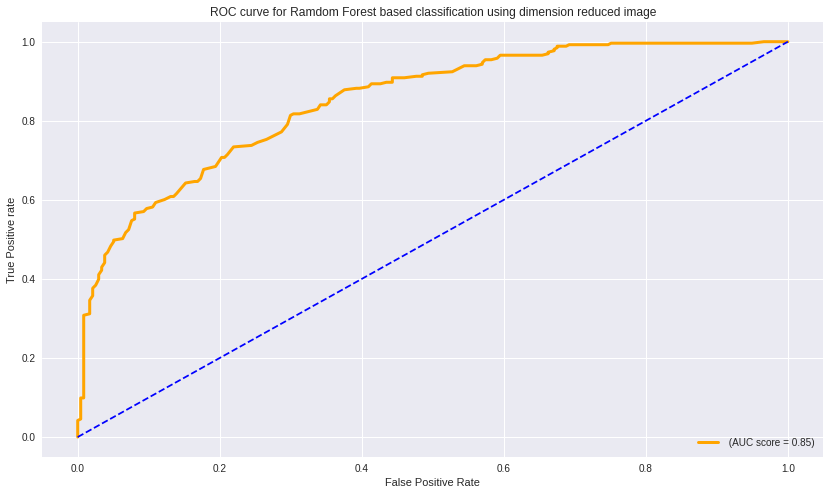

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
y_pred_proba=clf.predict_proba(test_encoded)
fpr, tpr, T = roc_curve(y_test,y_pred_proba[:,1])
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr,color='orange', linewidth=3.0, label=r' (AUC score = %0.2f)' % (auc_score) )
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve for Ramdom Forest based classification using dimension reduced image')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()